In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.patches as patches

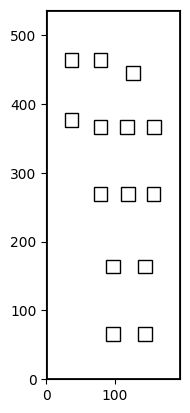

In [2]:
# 새로운 플롯 설정
fig, ax = plt.subplots()

# 밑창 외곽선을 그리기 위한 좌표 설정 - right
sole_outline = patches.Rectangle((0, 0), width=195, height=537, fill=False, edgecolor='black', lw=2)

# 격자를 그리기 위한 사각형들 추가 (사각형 좌표 및 크기 설정)
x_ls = [[87, 134], [87, 134], [69, 109, 146], [27, 69, 107, 147], [27, 69, 116]]
y_ls = [[56, 56], [154, 154], [259, 259, 259], [367, 356, 356, 356], [454, 454, 435]]
sensor_size = 20
foot_w = 196
foot_h = 537 # width, height
plantar_r = []


# 각 좌표에 대해 사각형 패치를 추가
for i in range(len(x_ls)):  # x_ls의 길이만큼 반복
    for j in range(len(x_ls[i])):  # 각 줄의 x 좌표에 맞는 y 좌표들에 대해 반복
        plantar_r.append(patches.Rectangle((x_ls[i][j], y_ls[i][j]), sensor_size, sensor_size, edgecolor='black', fill=False))

# 도형을 플롯에 추가
ax.add_patch(sole_outline)
for r in plantar_r:
    ax.add_patch(r)

# 축 크기와 비율 설정
ax.set_xlim(0, 195)
ax.set_ylim(0, 537)
ax.set_aspect('equal')

In [3]:
# 좌표 각 요소에 10을 더한 새로운 좌표 리스트 생성
x_ls_offset = [[x + 10 for x in row] for row in x_ls]
y_ls_offset = [[y + 10 for y in row] for row in y_ls]

In [14]:
# 임의의 값을 각 좌표에 할당
z_values = np.random.rand(sum(len(row) for row in x_ls_offset))  # 임의의 값
print(z_values)
# x_ls_offset과 y_ls_offset을 1D 리스트로 변환
x_coords = [x for row in x_ls_offset for x in row]
y_coords = [y for row in y_ls_offset for y in row]

# x, y 좌표 격자 생성
x_l = 0
x_r = 195  # left, right
y_b = 0
y_u = 537  # bottom, upper
x_size = 100
y_size = 300
x_grid = np.linspace(x_l, x_r, x_size)
y_grid = np.linspace(y_b, y_u, y_size)
X, Y = np.meshgrid(x_grid, y_grid)

# griddata를 사용하여 x, y 좌표에 대해 z 값을 보간
Z = griddata((x_coords, y_coords), z_values, (X, Y), method='cubic')

# 격자형 데이터를 플롯
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')

# 컬러바 추가
fig.colorbar(contour)

[0.34588695 0.38852436 0.27428018 0.09872533 0.18189755 0.97221567
 0.78543619 0.17229679 0.12060759 0.57730838 0.17716838 0.60440719
 0.57105227 0.69619295]


In [12]:
plt.show()

# 변경

In [15]:
x_l = 0
x_r = 537  # left, right
y_b = 0
y_u = 195  # bottom, upper
x_size = 10
y_size = 3000

In [ ]:
# 좌표 각 요소에 10을 더한 새로운 좌표 리스트 생성
x_ls_offset = [[x + 10 for x in row] for row in x_ls]
y_ls_offset = [[y + 10 for y in row] for row in y_ls]
# x_ls_offset과 y_ls_offset을 1D 리스트로 변환
x_coords = [x for row in x_ls_offset for x in row]
y_coords = [y for row in y_ls_offset for y in row]

# 임의의 값을 각 좌표에 할당
z_values = np.random.rand(sum(len(row) for row in x_ls_offset))  # 임의의 값

x_grid = np.linspace(x_l, x_r, x_size)
y_grid = np.linspace(y_b, y_u, y_size)
X, Y = np.meshgrid(x_grid, y_grid)

# x_ls_offset과 y_ls_offset을 1D 리스트로 변환
x_coords = [x for row in x_ls_offset for x in row]
y_coords = [y for row in y_ls_offset for y in row]


# griddata를 사용하여 x, y 좌표에 대해 z 값을 보간
Z = griddata((x_coords, y_coords), z_values, (X, Y), method='cubic')

# 격자형 데이터를 플롯
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')

# 컬러바 추가
fig.colorbar(contour)

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.set_facecolor('black')